In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv("../input/kan_mnist.csv")

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.label.value_counts(ascending=True)

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [5]:
explore_X,explore_y = [],[]
for i in range(len(data)):
    X,y = data.iloc[i, 1:].values.reshape(28,28), data.iloc[i].label   
    explore_X.append(np.array(X))
    explore_y.append(np.array(y))
explore_X = np.array(explore_X)
explore_y = np.array(explore_y)
print(explore_X.shape, explore_y.shape)

(60000, 28, 28) (60000,)


# Plot Mean Image

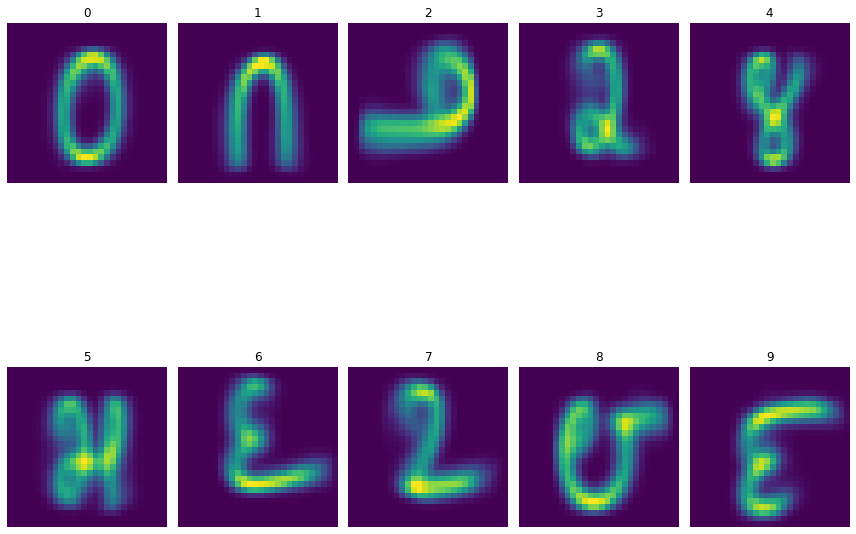

In [6]:
def get_class_arrays(class_index):
    return explore_X[explore_y==class_index], explore_y[explore_y==class_index]

def get_mean_images():
    plt.figure(figsize=(12, 12),tight_layout=1)
    for i in range(10):
        class_arrayX, class_arrayY = get_class_arrays(i)
        mean_image = class_arrayX.mean(axis=0)
        plt.subplot(2,5,i+1)
        plt.axis("off")
        plt.title(i)
        plt.imshow(mean_image.squeeze())
    plt.savefig("mean_samples.jpg",dpi=200,bbox_inches="tight")
        
get_mean_images()

# PCA

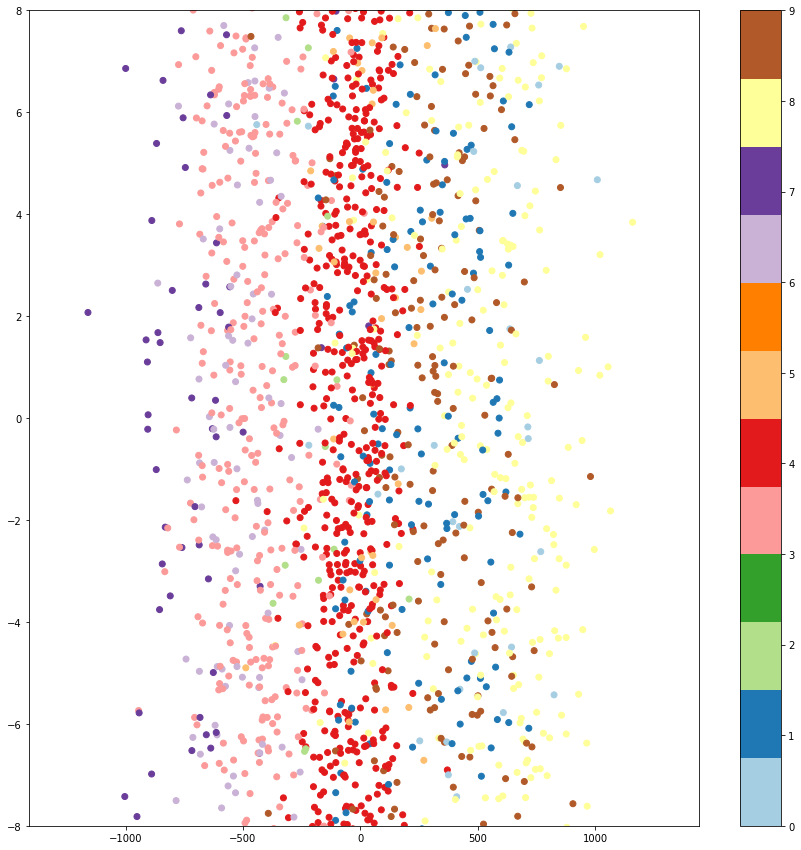

In [7]:
figure = plt.figure(figsize=(15,8))

pca = PCA(n_components=2)
proj = pca.fit_transform(explore_X.reshape(-1,784))
plt.scatter(proj[:, 0], proj[:, 1], c=explore_y, cmap="Paired")
plt.ylim([-8,8])
plt.colorbar(ticks=range(10))

# t-SNE

In [9]:
from MulticoreTSNE import MulticoreTSNE as TSNE
embeddings = TSNE(n_jobs=6).fit_transform(explore_X.reshape(-1,784))

In [18]:
np.save("tsne", embeddings)

In [20]:
embeddings = np.load("tsne.npy")

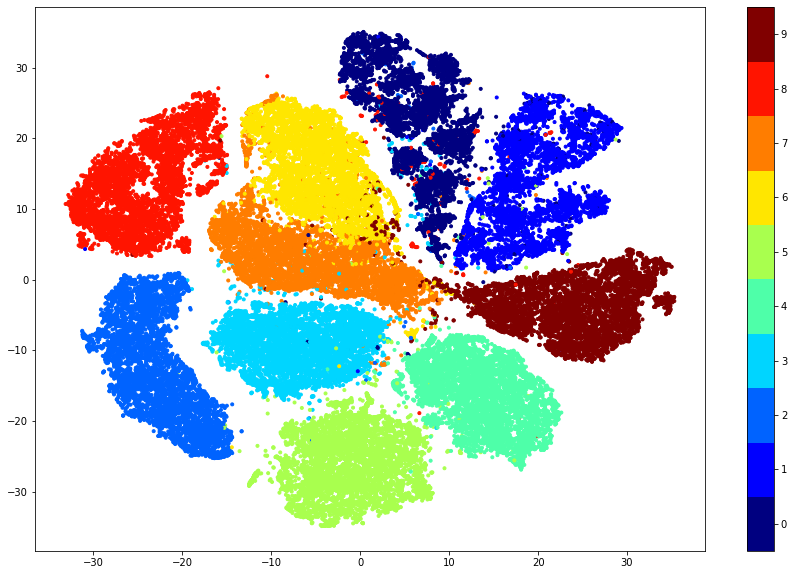

In [24]:
figure = plt.figure(figsize=(15,10))

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=explore_y, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.savefig("tsne.jpg",dpi=200,bbox_inches="tight")